In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

def generate_boundary_background(output_name, projection='wgs84'):
    # Definir la proyección
    if projection == 'wgs84':
        proj = ccrs.PlateCarree()
        extent = [-180, 180, -90, 90]
    else:
        # Aproximación para GOES-East (ajustar según necesidad)
        proj = ccrs.Geostationary(central_longitude=-75.0)
        extent = None

    fig = plt.figure(figsize=(20, 10), dpi=300, frameon=False)
    ax = fig.add_axes([0, 0, 1, 1], projection=proj, transform=proj)
    ax.axis('off')
    
    if extent: ax.set_extent(extent)

    # Añadir elementos (Líneas blancas para que resalten sobre el mar oscuro)
    ax.add_feature(cfeature.COASTLINE, edgecolor='cyan', linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=0.3, linestyle=':')
    
    # Guardar con fondo transparente
    plt.savefig(output_name, transparent=True, bbox_inches='tight', pad_inches=0)
    plt.close()
    print(f"✅ Fondo de fronteras generado: {output_name}")

# Uso:
generate_boundary_background("boundaries_wgs84_transparent.png", projection='wgs84')

✅ Fondo de fronteras generado: boundaries_wgs84_transparent.png


In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

def create_and_save_backgrounds():
    # 1. Configuración de la proyección (WGS84 para Plate Carrée)
    proj = ccrs.PlateCarree()
    
    # Creamos un set de fondos
    backgrounds = {
        "bg_borders_white": {"borders": "white", "coast": "cyan", "land": None},
        "bg_terrain_dark": {"borders": "#444444", "coast": "#666666", "land": "#1a1a1a", "ocean": "#0a0a0a"}
    }

    for name, colors in backgrounds.items():
        # Alta resolución (3600x1800 para WGS84 o 5424x5424 para GOES)
        fig = plt.figure(figsize=(20, 10), dpi=300, frameon=False)
        ax = fig.add_axes([0, 0, 1, 1], projection=proj)
        ax.axis('off')
        ax.set_global()

        # Si definimos color de tierra/mar (Mapa base sólido)
        if colors.get("land"):
            ax.add_feature(cfeature.LAND, facecolor=colors["land"])
        if colors.get("ocean"):
            ax.add_feature(cfeature.OCEAN, facecolor=colors["ocean"])
            
        # Líneas (Fronteras y Costas)
        ax.add_feature(cfeature.COASTLINE, edgecolor=colors["coast"], linewidth=0.7)
        ax.add_feature(cfeature.BORDERS, edgecolor=colors["borders"], linewidth=0.4)

        # Guardar
        output_path = f"{name}.png"
        plt.savefig(output_path, transparent=True, bbox_inches='tight', pad_inches=0)
        plt.close()
        print(f"💾 Generado y listo para descargar: {output_path}")

create_and_save_backgrounds()

💾 Generado y listo para descargar: bg_borders_white.png
💾 Generado y listo para descargar: bg_terrain_dark.png


/home/legion/bulk/MAIE_tesis2026/f01_code/MAIE_tesis_github/venv/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/legion/bulk/MAIE_tesis2026/f01_code/MAIE_tesis_github/venv/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/legion/bulk/MAIE_tesis2026/f01_code/MAIE_tesis_github/venv/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/legion/bulk/MAIE_tesis2026/f01_code/MAIE_tesis_github/venv/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.

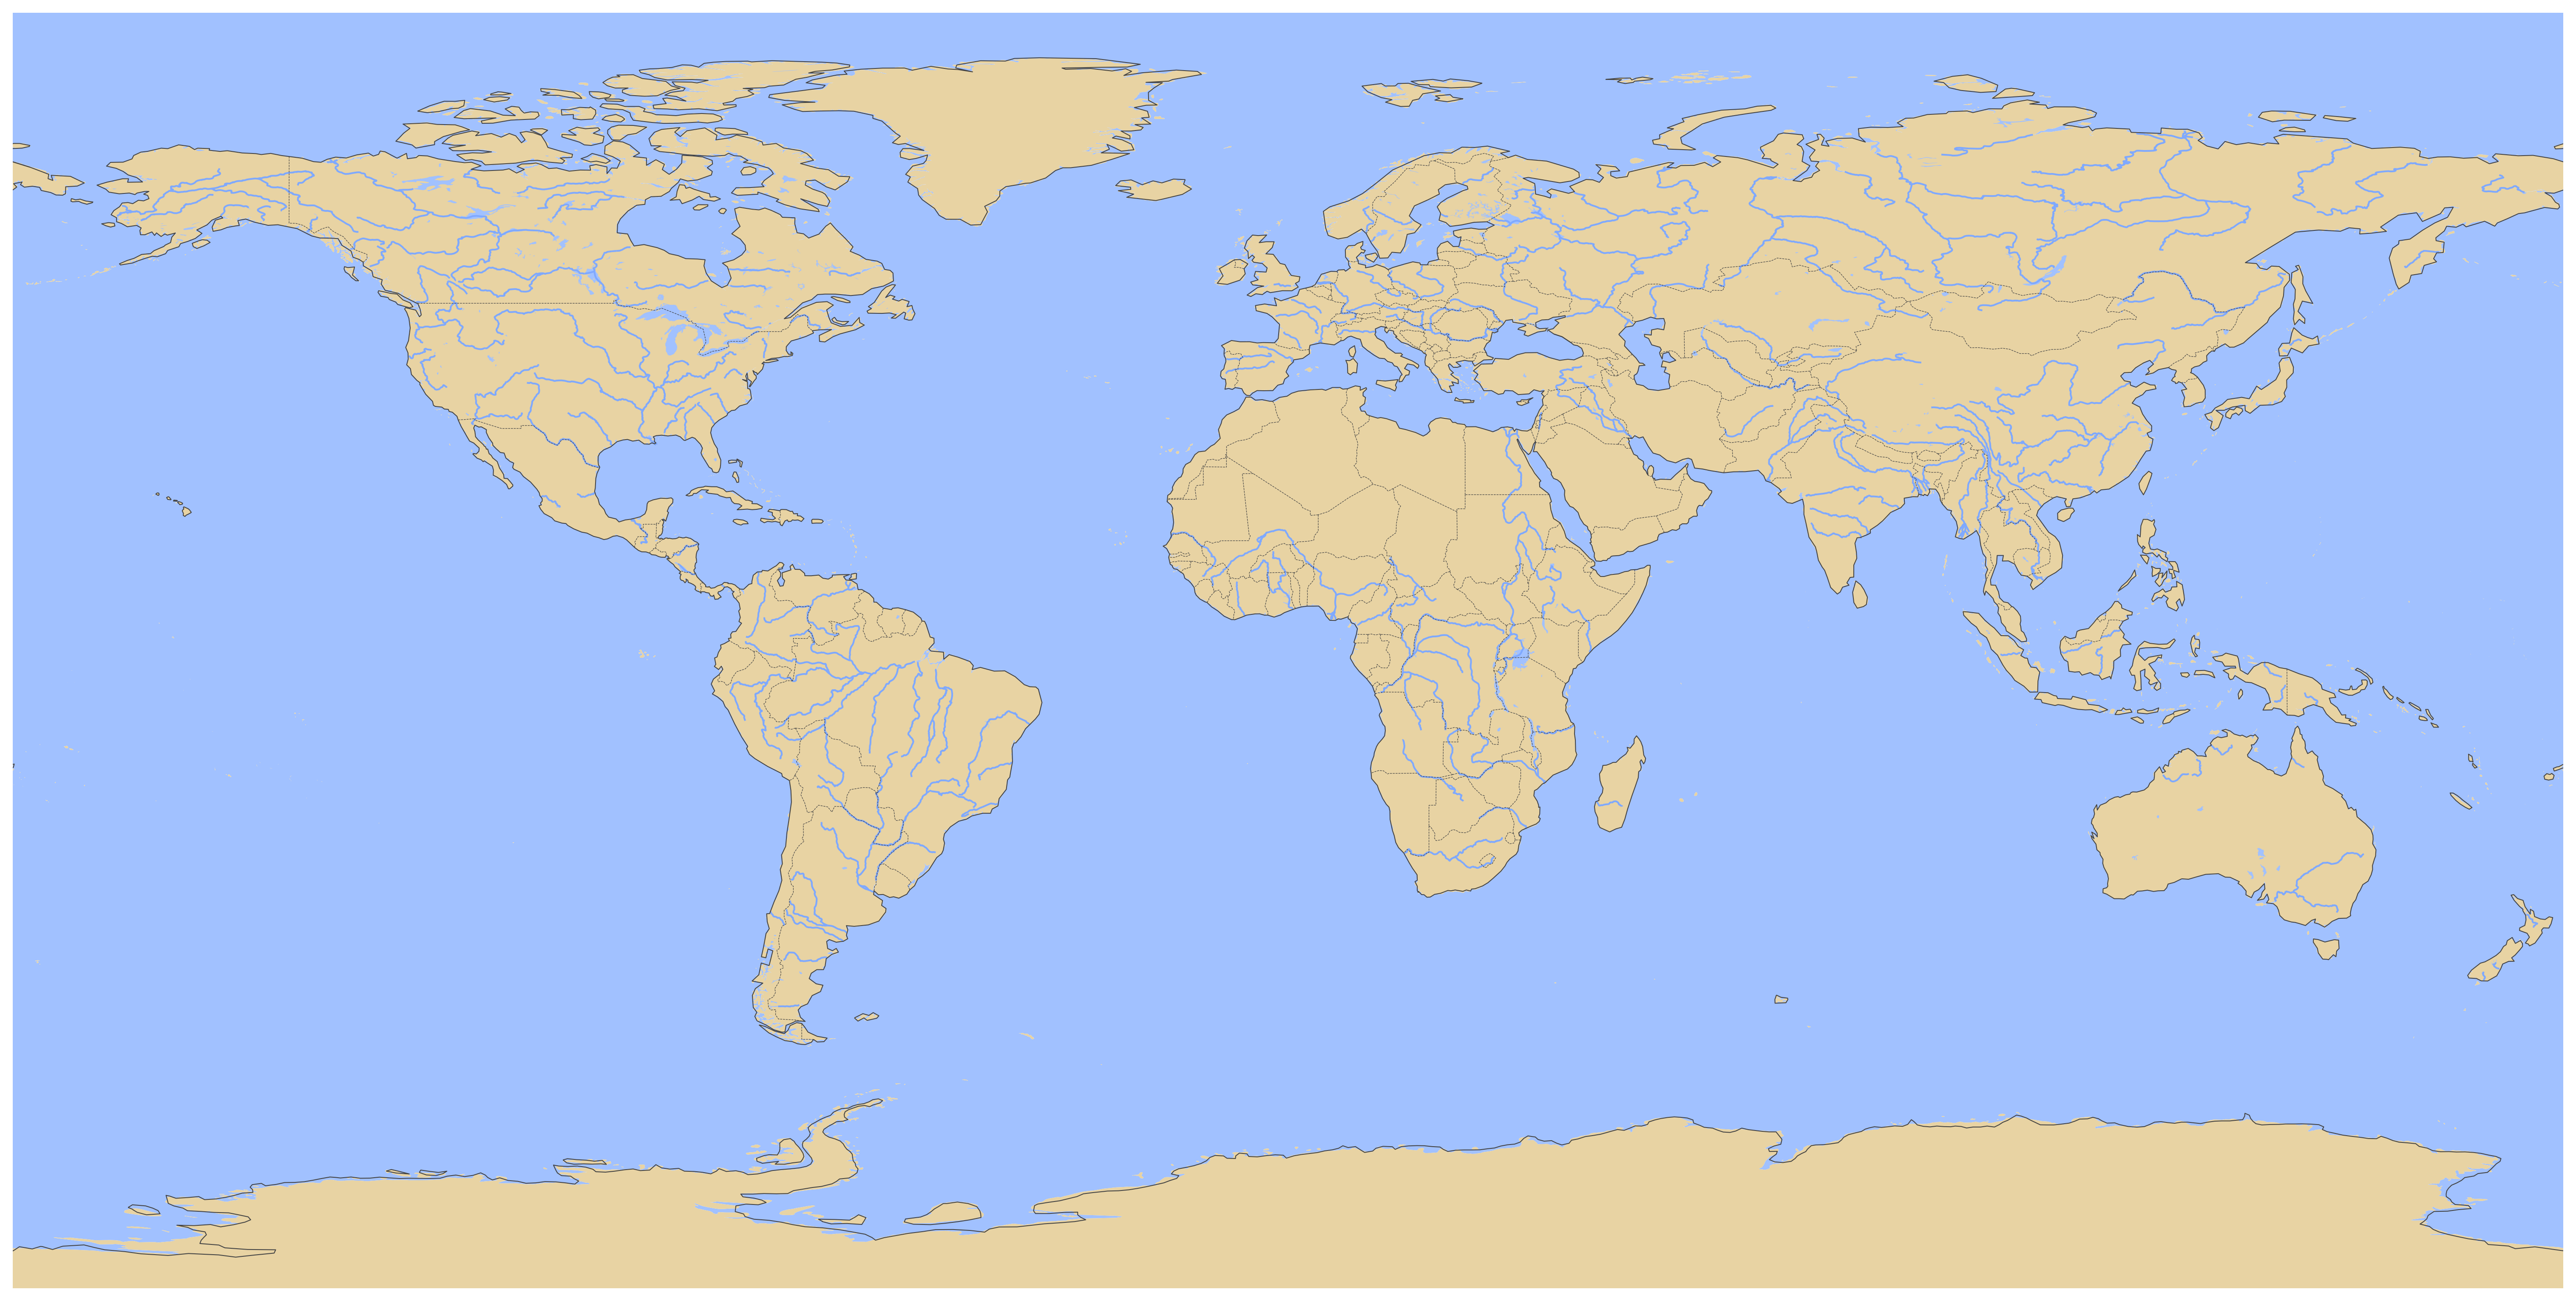

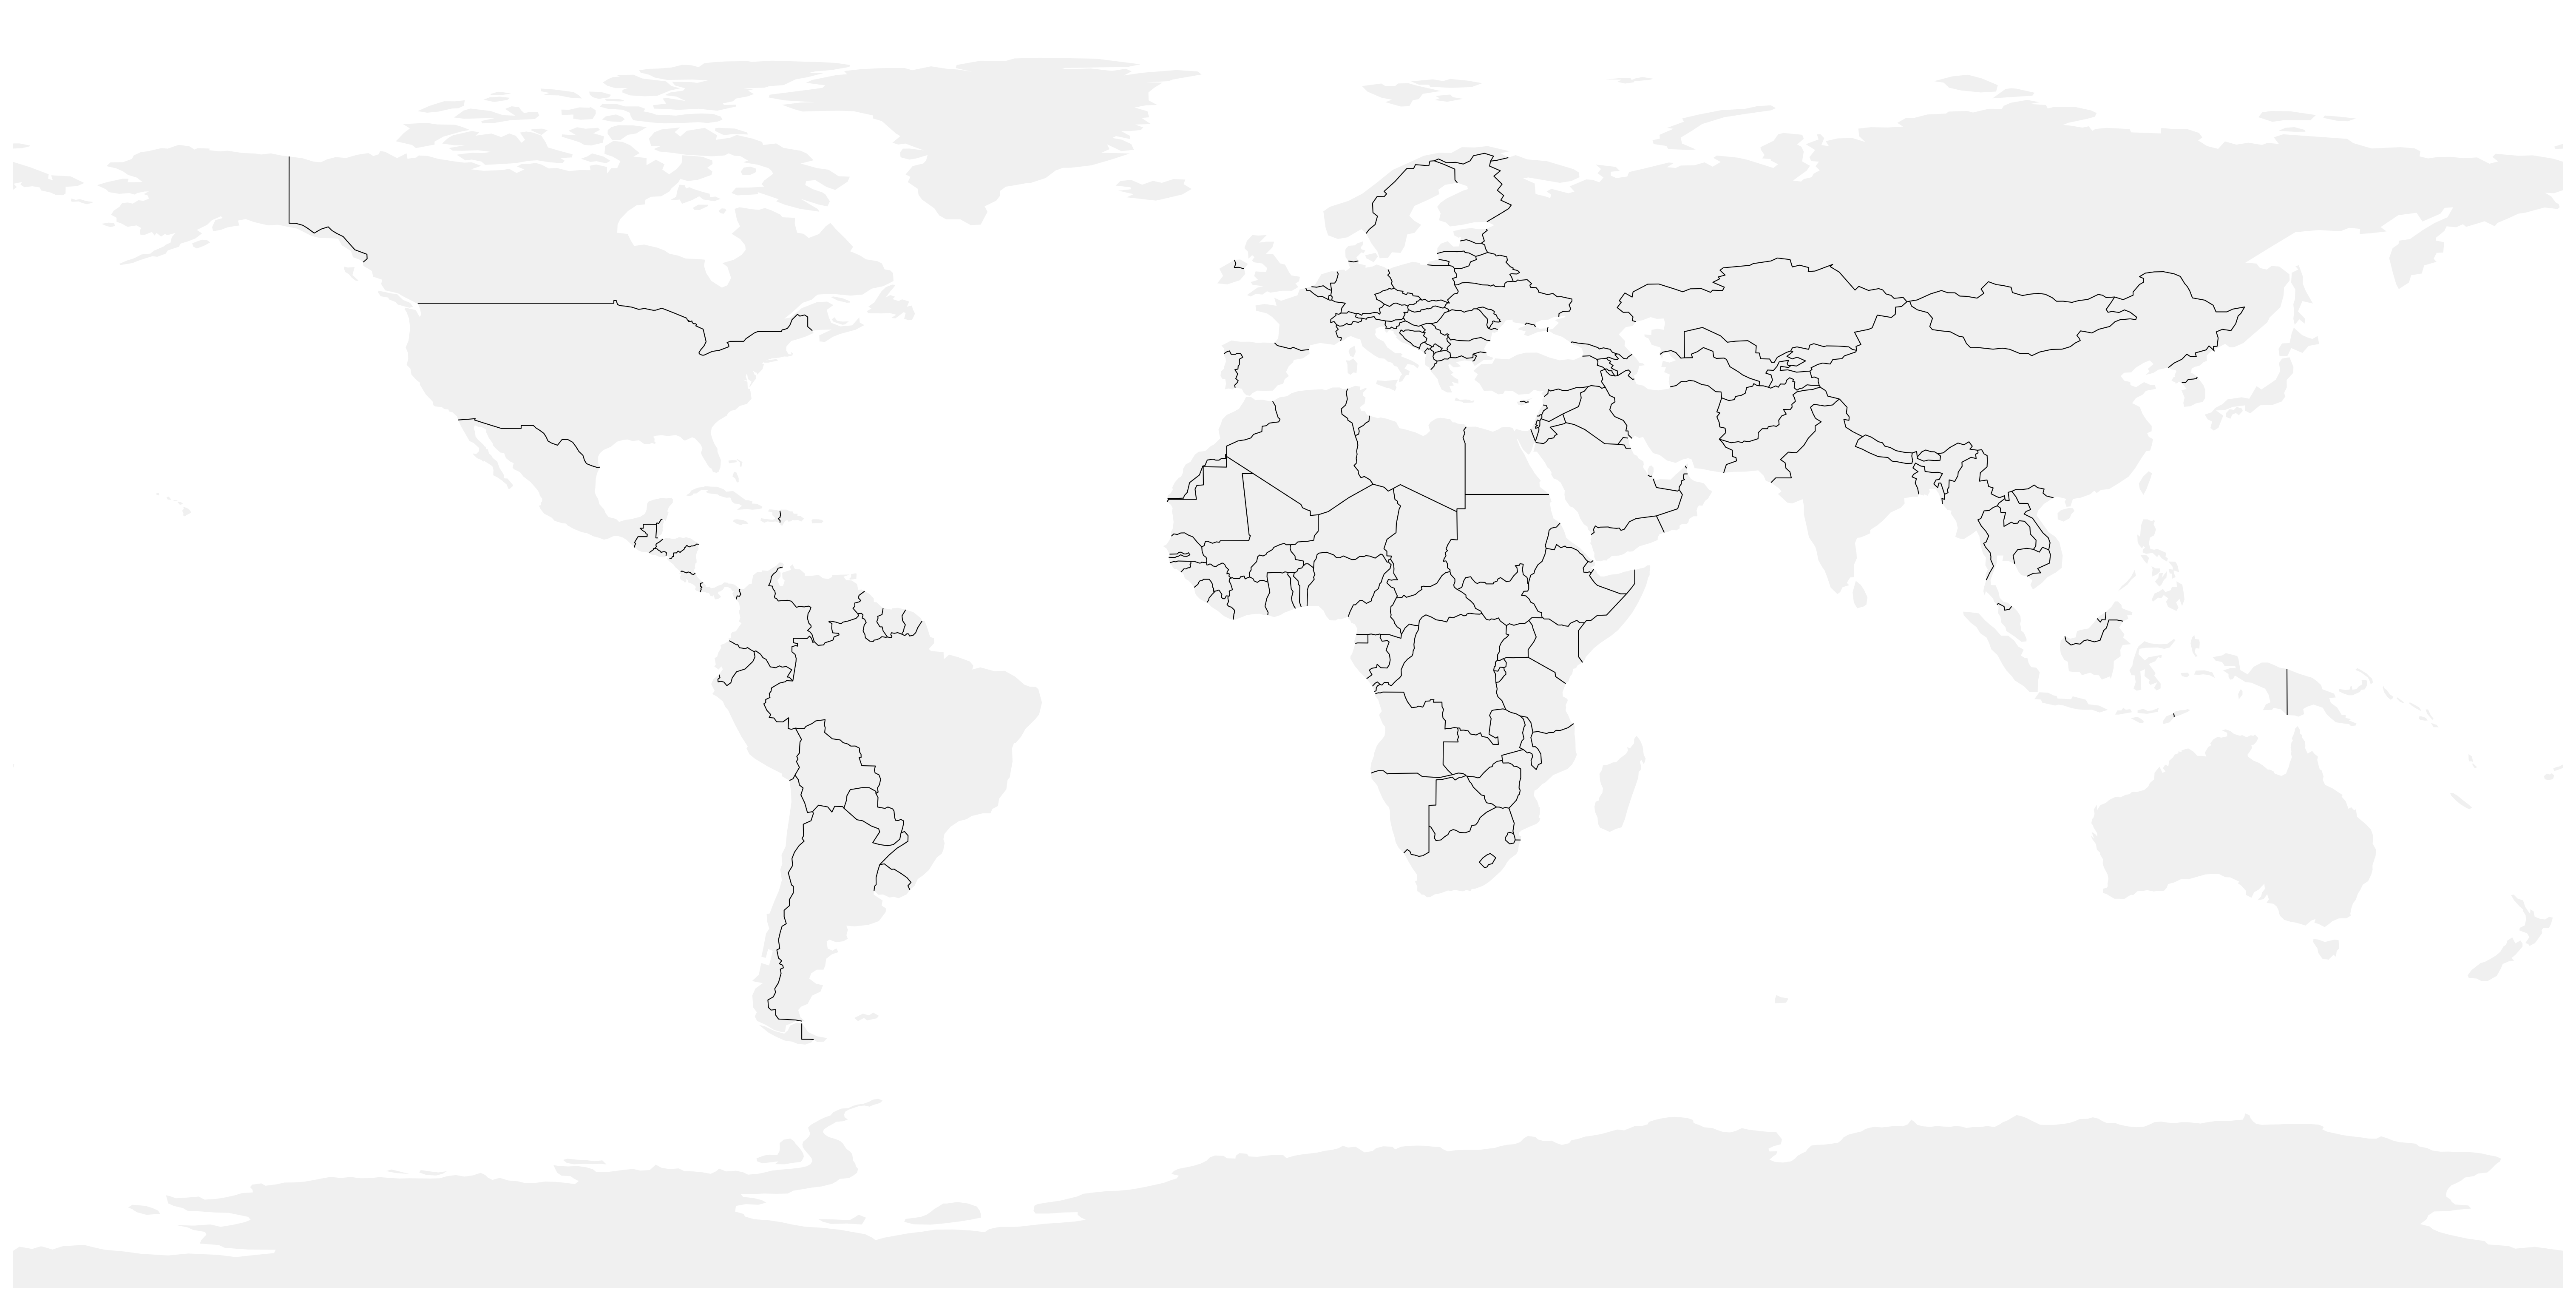

In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

def generate_atlas_backgrounds(projection_mode='wgs84'):
    # Elegir proyección
    proj = ccrs.PlateCarree() if projection_mode == 'wgs84' else ccrs.Geostationary(central_longitude=-75.0)
    
    # 1. MAPA FÍSICO (Estilo Escolar)
    fig = plt.figure(figsize=(20, 10), dpi=300)
    ax = fig.add_axes([0, 0, 1, 1], projection=proj)
    ax.axis('off')
    
    # Agregar capas de color estilo escolar
    ax.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor='#a1c1ff') # Azul agua
    ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='#e8d3a3')  # Tono tierra/arena
    ax.add_feature(cfeature.LAKES.with_scale('50m'), facecolor='#a1c1ff')
    ax.add_feature(cfeature.RIVERS.with_scale('50m'), edgecolor='#7fa9ff')
    ax.add_feature(cfeature.COASTLINE, edgecolor='#444444', linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, edgecolor='#444444', linewidth=0.3, linestyle='--')
    
    plt.savefig(f"fondo_escolar_fisico_{projection_mode}.png", transparent=False, bbox_inches='tight', pad_inches=0)
    plt.show()
    
    # 2. MAPA POLÍTICO (Con nombres de países)
    fig = plt.figure(figsize=(20, 10), dpi=300)
    ax = fig.add_axes([0, 0, 1, 1], projection=proj)
    ax.axis('off')
    
    # Pintar países (Cartopy usa una paleta básica)
    ax.add_feature(cfeature.LAND, facecolor='#f0f0f0') 
    ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.5)
    
    # Aquí podrías usar una librería como geopandas para poner los nombres
    # de las capitales si tienes el archivo .shp, pero como fondo base
    # te recomiendo mantenerlo limpio de texto para que no se "empaste" con tus datos.
    
    plt.savefig(f"fondo_politico_limpio_{projection_mode}.png", transparent=False, bbox_inches='tight', pad_inches=0)
    plt.show()

# Generar ambos
generate_atlas_backgrounds(projection_mode='wgs84')

In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

def generate_atlas_catalog(projection='wgs84'):
    # Elegir proyección
    proj = ccrs.PlateCarree() if projection == 'wgs84' else ccrs.Geostationary(central_longitude=-75.0)
    
    # Definición de los 10 estilos [Nombre, Color Tierra, Color Mar, Líneas, Alpha Tierra]
    styles = {
        "01_Escolar_Clasico": {"land": "#e8d3a3", "ocean": "#a1c1ff", "line": "#444444", "borders": True},
        "02_Dark_Mode": {"land": "#1a1a1a", "ocean": "#000000", "line": "#444444", "borders": True},
        "03_Blueprint": {"land": "#003366", "ocean": "#002244", "line": "#00ccff", "borders": True},
        "04_Minimalist_Light": {"land": "#ffffff", "ocean": "#f0f0f0", "line": "#cccccc", "borders": True},
        "05_Satellite_Mock": {"land": "#2c4c2c", "ocean": "#001a33", "line": "#ffffff33", "borders": False},
        "06_Old_Paper": {"land": "#dfc09f", "ocean": "#b3d1ff", "line": "#5d4037", "borders": True},
        "07_High_Contrast": {"land": "#000000", "ocean": "#ffffff", "line": "#ff0000", "borders": True},
        "08_Techno_Gray": {"land": "#333333", "ocean": "#222222", "line": "#00ff00", "borders": True},
        "09_Pastel_Soft": {"land": "#fdf5e6", "ocean": "#e0ffff", "line": "#b0c4de", "borders": True},
        "10_Physical_Only": {"land": "#d2b48c", "ocean": "#1e90ff", "line": "none", "borders": False}
    }

    for name, s in styles.items():
        fig = plt.figure(figsize=(20, 10), dpi=300)
        ax = fig.add_axes([0, 0, 1, 1], projection=proj)
        ax.axis('off')
        
        # Aplicar colores
        if s["land"]: ax.add_feature(cfeature.LAND, facecolor=s["land"])
        if s["ocean"]: ax.add_feature(cfeature.OCEAN, facecolor=s["ocean"])
        
        # Líneas
        if s["line"] != "none":
            ax.add_feature(cfeature.COASTLINE, edgecolor=s["line"], linewidth=0.6)
            if s["borders"]:
                ax.add_feature(cfeature.BORDERS, edgecolor=s["line"], linewidth=0.3, linestyle=':')
        
        # Guardar
        fname = f"bg_{name}_{projection}.png"
        plt.savefig(fname, transparent=False, bbox_inches='tight', pad_inches=0)
        plt.close()
        print(f"✅ Generado: {fname}")

generate_atlas_catalog(projection='wgs84')

✅ Generado: bg_01_Escolar_Clasico_wgs84.png
✅ Generado: bg_02_Dark_Mode_wgs84.png
✅ Generado: bg_03_Blueprint_wgs84.png
✅ Generado: bg_04_Minimalist_Light_wgs84.png
✅ Generado: bg_05_Satellite_Mock_wgs84.png
✅ Generado: bg_06_Old_Paper_wgs84.png
✅ Generado: bg_07_High_Contrast_wgs84.png
✅ Generado: bg_08_Techno_Gray_wgs84.png
✅ Generado: bg_09_Pastel_Soft_wgs84.png
✅ Generado: bg_10_Physical_Only_wgs84.png


In [1]:
# Opción A: Resolución Estándar (Recomendada para la mayoría de los casos)
!wget https://eoimages.gsfc.nasa.gov/images/imagerecords/73000/73751/world.topo.bathy.200407.3x5400x2700.jpg -O nasa_blue_marble_wgs84.jpg

# Opción B: Alta Resolución (Cuidado, es un archivo pesado)
!wget https://eoimages.gsfc.nasa.gov/images/imagerecords/73000/73751/world.topo.bathy.200407.3x21600x10800.jpg -O nasa_blue_marble_high_res.jpg

--2026-02-22 21:56:21--  https://eoimages.gsfc.nasa.gov/images/imagerecords/73000/73751/world.topo.bathy.200407.3x5400x2700.jpg
Resolving eoimages.gsfc.nasa.gov (eoimages.gsfc.nasa.gov)... 129.164.142.12, 2001:4d0:2310:170::12
Connecting to eoimages.gsfc.nasa.gov (eoimages.gsfc.nasa.gov)|129.164.142.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2308798 (2.2M) [image/jpeg]
Saving to: ‘nasa_blue_marble_wgs84.jpg’

nasa_blue_marble_wg 100%[===================>]   2.20M   599KB/s    in 3.8s    

2026-02-22 21:56:26 (599 KB/s) - ‘nasa_blue_marble_wgs84.jpg’ saved [2308798/2308798]

--2026-02-22 21:56:26--  https://eoimages.gsfc.nasa.gov/images/imagerecords/73000/73751/world.topo.bathy.200407.3x21600x10800.jpg
Resolving eoimages.gsfc.nasa.gov (eoimages.gsfc.nasa.gov)... 129.164.142.12, 2001:4d0:2310:170::12
Connecting to eoimages.gsfc.nasa.gov (eoimages.gsfc.nasa.gov)|129.164.142.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27201

📖 Cargando: nasa_blue_marble_wgs84_5400_2700.jpg
📏 Redimensionando a 3600x1800...
💾 Guardando en formato PNG...
✅ ¡Éxito! Archivo creado: nasa_blue_marble_WGS84_3600x1800.png


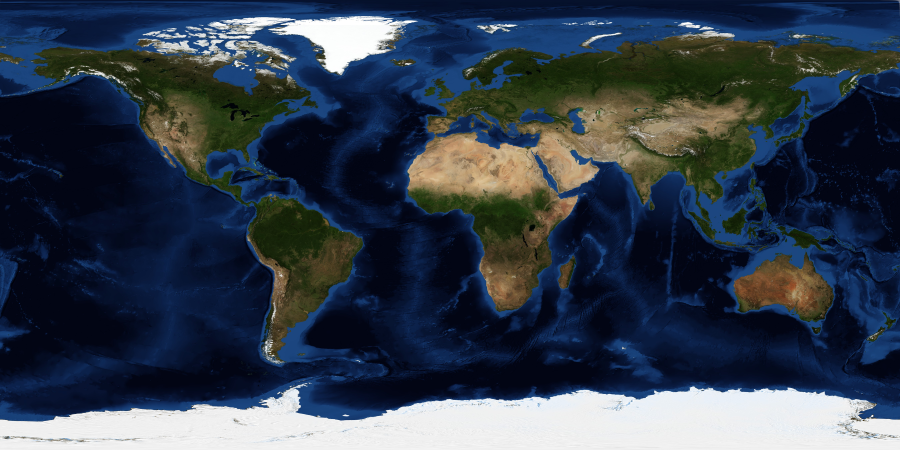

In [2]:
from PIL import Image
from pathlib import Path

# 1. Configuración de rutas
# Ajustado a la ruta que mostraste en tu terminal
path_base = Path("/home/legion/bulk/MAIE_tesis2026/f01_code/MAIE_tesis_github/extra/backgrounds/f01_wgs84_5400px_2700py")
input_file = path_base / "nasa_blue_marble_wgs84_5400_2700.jpg"
output_file = path_base / "nasa_blue_marble_WGS84_3600x1800.png"

# 2. Procesamiento
try:
    print(f"📖 Cargando: {input_file.name}")
    with Image.open(input_file) as img:
        # Redimensionar a 3600 x 1800 usando LANCZOS para máxima calidad
        print("📏 Redimensionando a 3600x1800...")
        img_resized = img.resize((3600, 1800), Image.Resampling.LANCZOS)
        
        # Convertir a RGBA y guardar como PNG
        print("💾 Guardando en formato PNG...")
        img_resized.convert("RGBA").save(output_file)
        
    print(f"✅ ¡Éxito! Archivo creado: {output_file.name}")
    
    # 3. Mostrar previsualización rápida
    display(img_resized.reduce(4)) # Mostramos una versión pequeña para no colapsar el notebook
    
except Exception as e:
    print(f"❌ Error: {e}")

In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from PIL import Image

def generate_texture_catalog():
    # Proyección WGS84 Plate Carrée
    proj = ccrs.PlateCarree()
    res = (36, 18) # Proporción 2:1 para 3600x1800 a 100 DPI
    
    # Definición de estilos (Puros: solo color de tierra y mar)
    styles = {
        "01_Fisico_Escolar": {"land": "#a5bc8e", "ocean": "#85c1e9"}, # Verde/Azul suave
        "02_Deep_Night":     {"land": "#111111", "ocean": "#050505"}, # Casi negro
        "03_Sahara_Draft":   {"land": "#d4a373", "ocean": "#1b4332"}, # Tonos tierra y mar oscuro
        "04_Blueprint_Solid":{"land": "#1b4965", "ocean": "#13315c"}, # Azules técnicos
        "05_Vintage_Map":    {"land": "#e9edc9", "ocean": "#a8dadc"}, # Tonos crema y pastel
        "06_Muted_Gray":     {"land": "#333333", "ocean": "#4f4f4f"}, # Gris para resaltar IR
        "07_Infrared_Style": {"land": "#220000", "ocean": "#000022"}, # Rojo/Azul profundo
        "08_Arctic_Cold":    {"land": "#e5e5e5", "ocean": "#90a4ae"}, # Blancos y grises fríos
        "09_Tierra_Fuego":   {"land": "#5d4037", "ocean": "#212121"}, # Marrón y carbón
        "10_Cyberpunk":      {"land": "#2d0036", "ocean": "#0b0014"}  # Púrpura y negro
    }

    for name, s in styles.items():
        # Configuramos el tamaño exacto para que al guardar a 100 DPI sea 3600x1800
        fig = plt.figure(figsize=res, dpi=100)
        ax = fig.add_axes([0, 0, 1, 1], projection=proj)
        ax.axis('off')
        ax.set_global()
        
        # Añadir solo las masas de tierra y mar (sin líneas)
        ax.add_feature(cfeature.LAND, facecolor=s["land"])
        ax.add_feature(cfeature.OCEAN, facecolor=s["ocean"])
        
        fname = f"texture_{name}_3600.png"
        plt.savefig(fname, transparent=False, bbox_inches='tight', pad_inches=0)
        plt.close()
        print(f"✅ Textura generada: {fname}")

generate_texture_catalog()

✅ Textura generada: texture_01_Fisico_Escolar_3600.png
✅ Textura generada: texture_02_Deep_Night_3600.png
✅ Textura generada: texture_03_Sahara_Draft_3600.png
✅ Textura generada: texture_04_Blueprint_Solid_3600.png
✅ Textura generada: texture_05_Vintage_Map_3600.png
✅ Textura generada: texture_06_Muted_Gray_3600.png
✅ Textura generada: texture_07_Infrared_Style_3600.png
✅ Textura generada: texture_08_Arctic_Cold_3600.png
✅ Textura generada: texture_09_Tierra_Fuego_3600.png
✅ Textura generada: texture_10_Cyberpunk_3600.png


In [5]:
from PIL import Image
from pathlib import Path

# 1. Definir la ruta de la carpeta (basada en tu terminal)
path_modificar = Path("/home/legion/bulk/MAIE_tesis2026/f01_code/MAIE_tesis_github/extra/backgrounds/f02_wgs84_3600px_1800py/modificar")

# 2. Lista de archivos a procesar
archivos_luces = ["night_lights_viirs_WGS84_only_land.png", "night_lights_viirs_WGS84.png"]

def redimensionar_luces_estandar(lista_archivos, path_carpeta):
    target_size = (3600, 1800)
    
    for nombre in lista_archivos:
        img_path = path_carpeta / nombre
        
        if img_path.exists():
            print(f"📏 Procesando: {nombre}...")
            with Image.open(img_path) as img:
                # Redimensionar con LANCZOS para no perder nitidez en los puntos de luz
                img_res = img.resize(target_size, Image.Resampling.LANCZOS)
                
                # Sobrescribir o guardar con sufijo (aquí lo guardaremos con el mismo nombre para que tus scripts ya funcionen)
                img_res.convert("RGBA").save(img_path)
                print(f"✅ Guardado correctamente en {target_size}")
        else:
            print(f"⚠️ No se encontró el archivo: {nombre}")

# Ejecutar
redimensionar_luces_estandar(archivos_luces, path_modificar)

📏 Procesando: night_lights_viirs_WGS84_only_land.png...
✅ Guardado correctamente en (3600, 1800)
📏 Procesando: night_lights_viirs_WGS84.png...


/home/legion/bulk/MAIE_tesis2026/f01_code/MAIE_tesis_github/venv/lib/python3.12/site-packages/PIL/Image.py:3451: DecompressionBombWarning: Image size (91125000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


✅ Guardado correctamente en (3600, 1800)


In [12]:
import numpy as np
from PIL import Image
from pathlib import Path
from pyresample import geometry, kd_tree
import warnings

# Ignorar advertencias de píxeles fuera del disco terrestre
warnings.filterwarnings('ignore', message='.*fraction of pixels mask.*')

def conversion_wgs84_a_goes_native(input_dir, output_dir_name="f03_native_goes_5424px"):
    input_path = Path(input_dir)
    output_path = input_path.parent / output_dir_name
    output_path.mkdir(parents=True, exist_ok=True)
    
    print(f"🚀 Iniciando conversión a GOES-East (5424px)...")

    # 1. Definición del mundo origen (WGS84 3600x1800)
    area_src = geometry.AreaDefinition(
        'wgs84', 'Global', 'wgs84',
        {'proj': 'longlat', 'datum': 'WGS84'},
        3600, 1800, (-180, -90, 180, 90)
    )

    # 2. Definición del disco destino (GOES-East Nativo)
    proj_goes = {
        'proj': 'geos', 'h': '35786023', 'lon_0': '-75', 
        'sweep': 'x', 'ellps': 'GRS80', 'units': 'm'
    }
    extent_goes = (-5434894.88, -5434894.88, 5434894.88, 5434894.88)
    area_dst = geometry.AreaDefinition('goes', 'Full Disk', 'goes', proj_goes, 5424, 5424, extent_goes)

    # 3. Loop de archivos
    for img_file in sorted(input_path.glob("*.png")):
        print(f"🔄 Convirtiendo: {img_file.name}")
        
        with Image.open(img_file) as img:
            data = np.array(img.convert("RGBA"))

        # Reproyectar canal por canal (R, G, B y Transparencia)
        canales_resampled = []
        for i in range(4):
            # Usamos resample_nearest para texturas de mapas o gauss para suavizar
            # En este caso kd_tree.resample_nearest es lo más eficiente y evita el error de atributo
            canal = kd_tree.resample_nearest(
                area_src, data[:, :, i], area_dst, 
                radius_of_influence=50000, fill_value=0
            )
            canales_resampled.append(canal.astype(np.uint8))

        # Reconstruir y guardar
        final_img = Image.fromarray(np.stack(canales_resampled, axis=2))
        nuevo_nombre = img_file.stem.replace("WGS84", "GOES_Native") + "_5424px.png"
        
        final_img.save(output_path / nuevo_nombre, optimize=True)
        print(f"✅ Generado: {nuevo_nombre}")

# --- Ejecución ---
dir_wgs84 = "/home/legion/bulk/MAIE_tesis2026/f01_code/MAIE_tesis_github/extra/backgrounds/f02_wgs84_3600px_1800py"
conversion_wgs84_a_goes_native(dir_wgs84)

🚀 Iniciando conversión a GOES-East (5424px)...
🔄 Convirtiendo: nasa_blue_marble_ONLY_LAND_3600.png
✅ Generado: nasa_blue_marble_ONLY_LAND_3600_5424px.png
🔄 Convirtiendo: nasa_blue_marble_WGS84_3600x1800.png
✅ Generado: nasa_blue_marble_GOES_Native_3600x1800_5424px.png
🔄 Convirtiendo: night_lights_viirs_WGS84_3600px_1800py.png
✅ Generado: night_lights_viirs_GOES_Native_3600px_1800py_5424px.png
🔄 Convirtiendo: night_lights_viirs_WGS84_only_land_3600px_1800py.png
✅ Generado: night_lights_viirs_GOES_Native_only_land_3600px_1800py_5424px.png
🔄 Convirtiendo: texture_05_Vintage_Map_3600.png
✅ Generado: texture_05_Vintage_Map_3600_5424px.png
🔄 Convirtiendo: texture_08_Arctic_Cold_3600.png
✅ Generado: texture_08_Arctic_Cold_3600_5424px.png


In [13]:
import numpy as np
from PIL import Image
from pathlib import Path
from pyresample import geometry, kd_tree

def generate_optimized_f04():
    # Rutas
    path_f02 = Path("/home/legion/bulk/MAIE_tesis2026/f01_code/MAIE_tesis_github/extra/backgrounds/f02_wgs84_3600px_1800py")
    path_f04 = path_f02.parent / "f04_preview_1086px"
    path_f04.mkdir(parents=True, exist_ok=True)

    # Definición Origen (3600x1800)
    area_src = geometry.AreaDefinition('wgs84', 'Global', 'wgs84',
                                       {'proj': 'longlat', 'datum': 'WGS84'},
                                       3600, 1800, (-180, -90, 180, 90))

    # Definición Destino DIRECTA a 1086x1086
    proj_goes = {'proj': 'geos', 'h': '35786023', 'lon_0': '-75', 'sweep': 'x', 'ellps': 'GRS80'}
    extent_goes = (-5434894.88, -5434894.88, 5434894.88, 5434894.88)
    area_dst_1086 = geometry.AreaDefinition('goes_mini', 'Full Disk Mini', 'goes', 
                                            proj_goes, 1086, 1086, extent_goes)

    for img_file in path_f02.glob("*.png"):
        print(f"✨ Procesando versión optimizada: {img_file.name}")
        with Image.open(img_file) as img:
            data = np.array(img.convert("RGBA"))
        
        # Reproyectamos directamente al tamaño final
        channels = []
        for i in range(4):
            ch = kd_tree.resample_nearest(area_src, data[:,:,i], area_dst_1086, 
                                          radius_of_influence=50000, fill_value=0)
            channels.append(ch.astype(np.uint8))
            
        final_img = Image.fromarray(np.stack(channels, axis=2))
        final_img.save(path_f04 / img_file.name.replace("3600", "1086_native"), optimize=True)

generate_optimized_f04()

✨ Procesando versión optimizada: texture_08_Arctic_Cold_3600.png
✨ Procesando versión optimizada: night_lights_viirs_WGS84_only_land_3600px_1800py.png
✨ Procesando versión optimizada: nasa_blue_marble_WGS84_3600x1800.png
✨ Procesando versión optimizada: night_lights_viirs_WGS84_3600px_1800py.png
✨ Procesando versión optimizada: texture_05_Vintage_Map_3600.png
✨ Procesando versión optimizada: nasa_blue_marble_ONLY_LAND_3600.png


📖 Cargando imágenes...
✂️ Aplicando máscara de transparencia (Extraer continentes)...
✅ ¡Éxito! Imagen creada: nasa_blue_marble_ONLY_LAND_3600.png


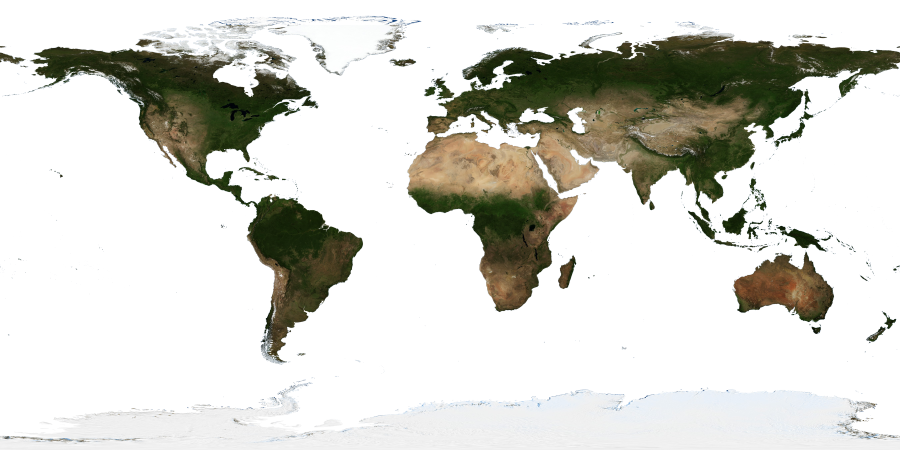

In [11]:
from PIL import Image
from pathlib import Path

# 1. Configuración de rutas
path_base = Path("/home/legion/bulk/MAIE_tesis2026/f01_code/MAIE_tesis_github/extra/backgrounds/f02_wgs84_3600px_1800py")
file_mask = path_base / "night_lights_viirs_WGS84_only_land_3600px_1800py.png"
file_nasa = path_base / "nasa_blue_marble_WGS84_3600x1800.png"
file_output = path_base / "nasa_blue_marble_ONLY_LAND_3600.png"

def extract_land_only_nasa():
    try:
        print("📖 Cargando imágenes...")
        # Abrimos la imagen de la NASA (el color)
        nasa_img = Image.open(file_nasa).convert("RGBA")
        
        # Abrimos la de luces que tiene la transparencia del mar (la máscara)
        mask_img = Image.open(file_mask).convert("RGBA")
        
        print("✂️ Aplicando máscara de transparencia (Extraer continentes)...")
        # Extraemos el canal Alpha (el cuarto canal) de la máscara
        _, _, _, alpha_mask = mask_img.split()
        
        # Separamos los canales de la NASA
        r, g, b, _ = nasa_img.split()
        
        # Creamos la nueva imagen usando el color de NASA pero el Alpha de la máscara
        nasa_land_only = Image.merge("RGBA", (r, g, b, alpha_mask))
        
        # Guardar resultado
        nasa_land_only.save(file_output, optimize=True)
        print(f"✅ ¡Éxito! Imagen creada: {file_output.name}")
        
        # Previsualización pequeña
        return nasa_land_only.reduce(4)
        
    except Exception as e:
        print(f"❌ Error: {e}")

# Ejecutar
extract_land_only_nasa()

In [ ]:
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Ruta base en la Legion
BASE_PATH = "/home/legion/bulk/MAIE_tesis2026/f01_code/MAIE_tesis_github/extra/top_layers"

colores = {
    'white': 'white',
    'yellow': 'yellow',
    'cyan': 'cyan',
    'magenta': 'magenta',
    'green': '#00FF00'
}

# Configuración de carpetas según tu 'ls'
config_carpetas = {
    "borders_wgs84_3600px_1800py": (3600, 1800, ccrs.PlateCarree(), "borders"),
    "coast_wgs84_3600px_1800py": (3600, 1800, ccrs.PlateCarree(), "coast"),
    "borders_goes_east_1086ps_1086py": (1086, 1086, ccrs.Geostationary(central_longitude=-75.0), "borders"),
    "coast_goes_east_1086ps_1086py": (1086, 1086, ccrs.Geostationary(central_longitude=-75.0), "coast"),
    "borders_goes_east_5424px_5424py": (5424, 5424, ccrs.Geostationary(central_longitude=-75.0), "borders"),
    "coast_goes_east_5424px_5424py": (5424, 5424, ccrs.Geostationary(central_longitude=-75.0), "coast")
}

def generar_capas():
    print("🌎 Generando capas de Fronteras y Costas...")

    for folder, (w, h, proj, tipo) in config_carpetas.items():
        path_completo = os.path.join(BASE_PATH, folder)
        
        if not os.path.exists(path_completo):
            print(f"❌ Saltando: {folder} (No existe)")
            continue

        print(f"📂 Carpeta: {folder}")
        
        # Ajustar grosor según resolución
        grosor = 1.5 if w > 5000 else 0.8
        
        for c_name, c_hex in colores.items():
            fig = plt.figure(figsize=(w/100, h/100), dpi=100, frameon=False)
            ax = fig.add_axes([0, 0, 1, 1], projection=proj)
            ax.axis('off')
            ax.patch.set_alpha(0.0)

            if "wgs84" in folder:
                ax.set_global()

            # --- DIBUJO ---
            if tipo == "borders":
                # Fronteras internacionales de los países
                ax.add_feature(cfeature.BORDERS.with_scale('10m'), edgecolor=c_hex, linewidth=grosor)
            else:
                # Líneas de costa
                ax.add_feature(cfeature.COASTLINE.with_scale('10m'), edgecolor=c_hex, linewidth=grosor)

            file_path = os.path.join(path_completo, f"{tipo}_{c_name}.png")
            plt.savefig(file_path, transparent=True, pad_inches=0)
            plt.close()
            print(f"   ✅ {tipo}_{c_name}.png generado.")

if __name__ == "__main__":
    generar_capas()

🚀 Iniciando generación de capas por carpeta...
📂 Procesando carpeta: borders_wgs84_3600px_1800py
   ✅ Guardado: borders_white.png
   ✅ Guardado: borders_yellow.png
   ✅ Guardado: borders_cyan.png
   ✅ Guardado: borders_magenta.png
   ✅ Guardado: borders_green.png
📂 Procesando carpeta: coast_wgs84_3600px_1800py
   ✅ Guardado: coast_white.png
   ✅ Guardado: coast_yellow.png
   ✅ Guardado: coast_cyan.png
   ✅ Guardado: coast_magenta.png
   ✅ Guardado: coast_green.png
📂 Procesando carpeta: borders_goes_east_1086ps_1086py
   ✅ Guardado: borders_white.png
   ✅ Guardado: borders_yellow.png
   ✅ Guardado: borders_cyan.png
   ✅ Guardado: borders_magenta.png
   ✅ Guardado: borders_green.png
📂 Procesando carpeta: coast_goes_east_1086ps_1086py
   ✅ Guardado: coast_white.png
   ✅ Guardado: coast_yellow.png
   ✅ Guardado: coast_cyan.png
   ✅ Guardado: coast_magenta.png
   ✅ Guardado: coast_green.png
📂 Procesando carpeta: borders_goes_east_5424px_5424py
   ✅ Guardado: borders_white.png
   ✅ Guardado: